In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from scipy.stats import bernoulli, binom

# Part 1: Empirical Learning Rates for the Exponential Weights Algorithm

In [20]:
class EWAlg:
    def __init__(self, epsilon, k, h):
        self.weights = np.ones(k)
        self.payoffs = np.zeros(k)
        self.h = h
        self.k = k
        self.epsilon = epsilon
        self.sumWeights = np.sum(self.weights)
        self.probs = self.weights/self.sumWeights

    def getAction(self):
        j = np.random.choice(self.k, 1, p = self.probs)
        return j.item()
    
    def update(self, payoffs):
        for j in range(len(payoffs)):
            curPayoff = payoffs[j]
            self.payoffs[j] = self.payoffs[j] + curPayoff
            newWeight = (1+self.epsilon)**(self.payoffs[j]/self.h)
            self.weights[j] = newWeight
        self.sumWeights = np.sum(self.weights)
        self.probs = self.weights/self.sumWeights
        return

## Adversarial Fair Payoffs

In each round i:

Draw a payoff x ~ U[0,1] (i.e., from the uniform distribution on interval [0,1])

Assign this payoff to the action j* that has the smallest total payoff so far, i.e., j* = argminj Vji-1 where Vji = Σir=1 vji. 
(All other actions get 0 payoff in round i.)

In [21]:
h = 1 # fixed
# hyperparameters
k = 5
n = 100
epsilons = [0, 0.1, 0.1517, 0.2, 0.4, 0.6, 0.9, 1.5, 4, 100] # to be studied
monteCarloBound = 1000

avgPayoffs = []
avgRegrets = []
for epsilon in epsilons:
    sumPayoff = 0
    sumRegret = 0   
    for i in range(monteCarloBound):
        alg = EWAlg(epsilon, k, h)
        totalPayoffs = np.zeros(k)
        myPayoff = 0
        for i in range(n):
            # generate adversarial payoffs
            adversarialPayoffs = np.zeros(k)
            x = np.random.rand(1)
            least = np.argmin(totalPayoffs)
            adversarialPayoffs[least] = x
            totalPayoffs = totalPayoffs + adversarialPayoffs
            j = alg.getAction()
            myPayoff += adversarialPayoffs[j]
            alg.update(adversarialPayoffs)

        OPT = max(totalPayoffs)
        regret = (OPT - myPayoff).item() / n
        sumPayoff += myPayoff
        sumRegret += regret
    avgPayoffs.append(sumPayoff/n)
    avgRegrets.append(sumRegret/n)

print(epsilons)
print(avgPayoffs)
print(avgRegrets)

[0, 0.1, 0.1517, 0.2, 0.4, 0.6, 0.9, 1.5, 4, 100]
[99.73811018315929, 98.53001321626625, 96.48444542219677, 95.3895271567564, 91.83126624929236, 88.5923728644621, 83.36817028610726, 77.71924613395498, 62.31556285777755, 21.277743851888257]
[0.037336857905223286, 0.05136622461726618, 0.06701384267278584, 0.07633321989391477, 0.11405311998131162, 0.14840551691212045, 0.197831292286316, 0.25566427645494494, 0.4104837582646857, 0.8203953365548768]


/var/folders/kb/z6625cjd6pq30cwdbky7yddr0000gn/T/ipykernel_40188/3490768314.py:5: RuntimeWarning: divide by zero encountered in log
  plt.bar(np.log(epsilons),avgPayoffs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/axes/_axes.py:2162: RuntimeWarning: invalid value encountered in double_scalars
  dx = [convert(x0 + ddx) - x for ddx in dx]


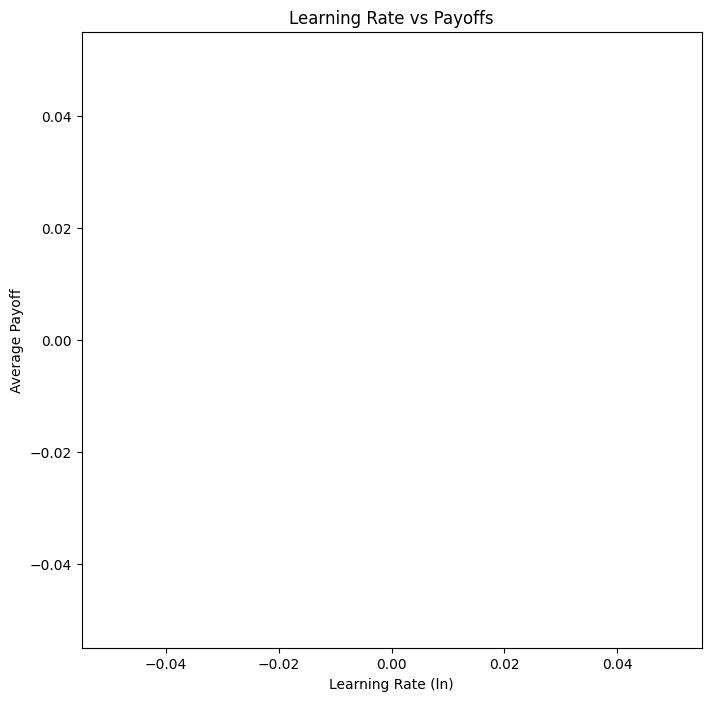

/var/folders/kb/z6625cjd6pq30cwdbky7yddr0000gn/T/ipykernel_40188/3490768314.py:14: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(epsilons),avgRegrets)


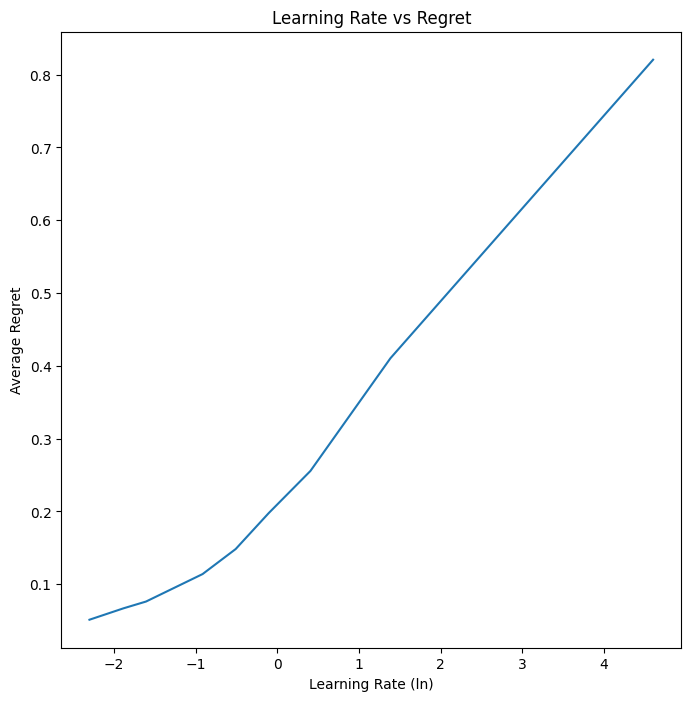

In [22]:
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(8)

plt.bar(np.log(epsilons),avgPayoffs)
plt.title('Learning Rate vs Payoffs')
plt.xlabel('Learning Rate (ln)')
plt.ylabel('Average Payoff')
plt.show()

f = plt.figure()
f.set_figwidth(8)
f.set_figheight(8)
plt.plot(np.log(epsilons),avgRegrets)
plt.title('Learning Rate vs Regret')
plt.xlabel('Learning Rate (ln)')
plt.ylabel('Average Regret')
plt.show()

## Bernoulli Payoffs

In [23]:
h = 1 # fixed
# hyperparameters
k = 10
n = 100
epsilons = [0, 0.1, 0.1517, 0.2, 0.4, 0.6, 0.9, 1.5, 4, 100] # to be studied
monteCarloBound = 125

avgPayoffs = []
avgRegrets = []
for epsilon in epsilons:
    sumPayoff = 0
    sumRegret = 0   
    for i in range(monteCarloBound):
        payoffProbs = np.random.uniform(0, 0.5, k)
        bernouliPayoffs = [bernoulli(p) for p in payoffProbs]
        alg = EWAlg(epsilon, k, h)
        totalPayoffs = np.zeros(k)
        myPayoff = 0
        for i in range(n):
            # generate bernouli payoffs
            iPayoffs = np.array([b.rvs(1) for b in bernouliPayoffs]).flatten()
            totalPayoffs = totalPayoffs + iPayoffs
            j = alg.getAction()
            myPayoff += iPayoffs[j]
            alg.update(iPayoffs)

        OPT = max(totalPayoffs)
        regret = (OPT - myPayoff).item() / n
        sumPayoff += myPayoff
        sumRegret += regret
    avgPayoffs.append(sumPayoff/n)
    avgRegrets.append(sumRegret/n)

print(epsilons)
print(avgPayoffs)
print(avgRegrets)

[0, 0.1, 0.1517, 0.2, 0.4, 0.6, 0.9, 1.5, 4, 100]
[30.0, 40.41, 45.43, 46.26, 49.23, 49.98, 51.21, 51.66, 53.02, 53.38]
[0.2716999999999999, 0.1794, 0.15250000000000005, 0.13980000000000004, 0.09549999999999993, 0.0909, 0.08219999999999995, 0.07139999999999995, 0.06589999999999996, 0.06409999999999998]


/var/folders/kb/z6625cjd6pq30cwdbky7yddr0000gn/T/ipykernel_40188/3020364640.py:5: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(epsilons),avgPayoffs)


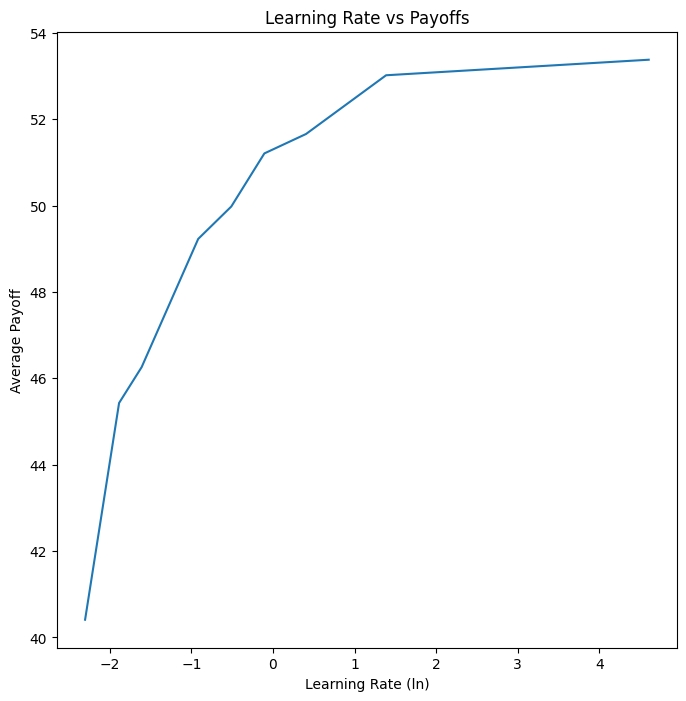

/var/folders/kb/z6625cjd6pq30cwdbky7yddr0000gn/T/ipykernel_40188/3020364640.py:14: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(epsilons),avgRegrets)


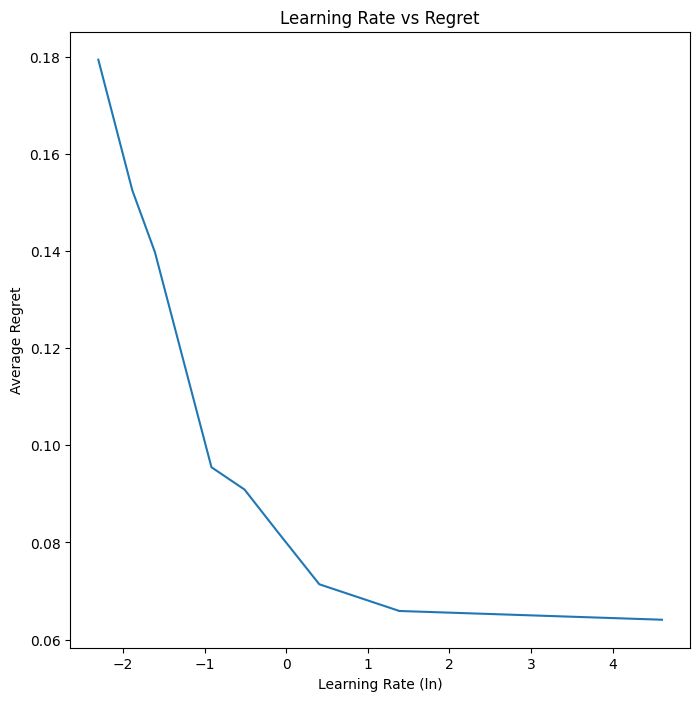

In [24]:
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(8)

plt.plot(np.log(epsilons),avgPayoffs)
plt.title('Learning Rate vs Payoffs')
plt.xlabel('Learning Rate (ln)')
plt.ylabel('Average Payoff')
plt.show()

f = plt.figure()
f.set_figwidth(8)
f.set_figheight(8)
plt.plot(np.log(epsilons),avgRegrets)
plt.title('Learning Rate vs Regret')
plt.xlabel('Learning Rate (ln)')
plt.ylabel('Average Regret')
plt.show()

In [54]:
#http://ergast.com/mrd/
f1Results = pd.read_csv("/Users/prabhavjain/Downloads/f1db_csv/constructor_results.csv")
f1Races = pd.read_csv("/Users/prabhavjain/Downloads/f1db_csv/races.csv")
f1Data = pd.merge(f1Results, f1Races, how="left", on="raceId")
f1Data = f1Data[f1Data['year'] > 2018]
f1Data = f1Data.drop(columns=['fp1_date', 'fp2_date', 'fp3_date', 'fp1_time', 'fp2_time', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time'])
f1Data = f1Data.drop(columns=['constructorResultsId', 'raceId', 'url', 'time', 'name', 'circuitId', 'round', 'status', 'year'])
constructorID = [9, 6, 210, 4, 131, 51, 211, 5, 1, 3, 213, 117, 214]
constructorNames = ["Red Bull", "Ferrari", "Haas", "Alpine", "Mercedes", "Alfa Romeo", "Aston Martin", "Alpha Tauri", "Mclaren", "Williams", "Alpha Tauri", "Aston Martin", "Alpine"]
f1Data['constructorId'] = f1Data['constructorId'].replace(constructorID, constructorNames)
f1Data['points'] = f1Data['points'].astype('int')
f1Data = f1Data.pivot(index='constructorId', columns='date', values='points')
f1Data.head(10)
f1Data.to_csv("/Users/prabhavjain/Northwestern Google Drive/CS 332/Online-Markets/f1Data.csv")